In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

faces = fetch_lfw_people(min_faces_per_person=50)

In [5]:
faces.data.shape

(1560, 2914)

In [6]:
faces.images[0].shape

(62, 47)

In [8]:
faces.target_names

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
        'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
        'Serena Williams', 'Tony Blair'], dtype='<U17'),
 12)

In [9]:
faces.target_names.size

12

In [11]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

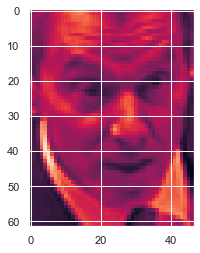

In [13]:
plt.imshow(faces.images[0])

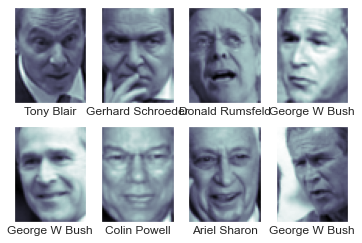

In [15]:
fig, ax = plt.subplots(2,4)

for idx, axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[idx]])

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [19]:
pca_model = PCA(n_components=150, whiten=True)
svmModel = SVC(kernel='rbf', class_weight='balanced')
mdl = make_pipeline(pca_model, svmModel)

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(faces.data, faces.target, test_size=0.2)

In [23]:
param_grid = {'svc__C': [1, 5, 15, 30], 'svc__gamma': [0.00001, 0.00005, 0.0001, 0.005]}
grid = GridSearchCV(mdl, param_grid)

In [24]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [25]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


Text(0.5, 0.98, 'Wrong is red')

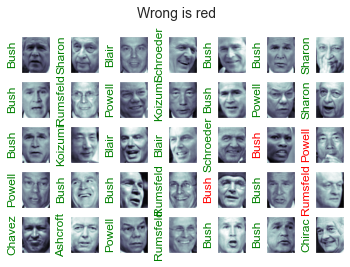

<Figure size 1584x1584 with 0 Axes>

In [31]:
mdl = grid.best_estimator_
y_pred = mdl.predict(X_test)
fig, ax = plt.subplots(5,7)


for idx, axidx in enumerate(ax.flat):
    axidx.imshow(X_test[idx].reshape(62, 47), cmap='bone')
    axidx.set(xticks=[], yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1], 
                     color='green' if y_pred[idx] == Y_test[idx] else 'red')
plt.figure(figsize=(22,22))
fig.suptitle('Wrong is red', fontsize=14)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.76      0.87        17
     Colin Powell       0.73      0.98      0.83        46
  Donald Rumsfeld       0.83      0.71      0.77        28
    George W Bush       0.78      0.97      0.86        98
Gerhard Schroeder       1.00      0.50      0.67        18
      Hugo Chavez       0.87      0.81      0.84        16
   Jacques Chirac       1.00      0.50      0.67        12
    Jean Chretien       0.88      0.64      0.74        11
    John Ashcroft       1.00      0.62      0.77         8
Junichiro Koizumi       1.00      0.86      0.92        14
  Serena Williams       0.88      0.44      0.58        16
       Tony Blair       0.93      0.93      0.93        28

         accuracy                           0.83       312
        macro avg       0.91      0.73      0.79       312
     weighted avg       0.85      0.83      0.82       312



Text(0.5, 12.5, 'predicted label')

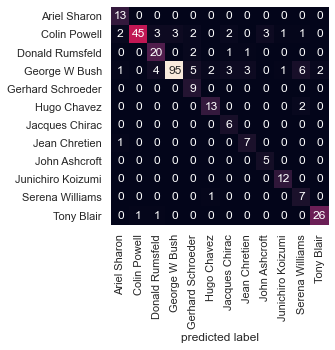

In [34]:
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, 
            yticklabels=faces.target_names)

plt.xlabel('true label')
plt.xlabel('predicted label')